# This is a tutorial

## Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #pip install seaborn
import matplotlib.pyplot as plt
import plotly.express as px # pip install plotly
from IPython.display import display, HTML #pip install ipython

## Step 1: Data Collection
In this step, we will gather interested data to explore. <br>
Source links: (for the csv files, check out this repository...)<br>
[1]https://ourworldindata.org/child-maltreatment-and-educational-outcomes <br>
[2]https://www.kaggle.com/datasets/jessemostipak/college-tuition-diversity-and-pay <br>
[3]https://nces.ed.gov/programs/coe/indicator/cpbcollege-enrollment-rate#:~:text=The%20overall%20college%20enrollment%20rate%20of%2018%2D%20to%2024%2Dyear,%2D%20or%204%2Dyear%20institutions <br>
[4]https://www.kaggle.com/datasets/shariful07/student-mental-health <br>
[5]https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success <br>
[6]https://nces.ed.gov/programs/coe/indicator/a01/violent-deaths-and-shootings <br>
[7]https://research.com/education/college-drug-abuse-statistics <br>

In [3]:
df_children_work = pd.read_csv('working-children-out-of-school-ages-7-14-vs-hours-worked-by-children-ages-7-14.csv')
df_usa_salary_potential = pd.read_csv('usa_salary_potential.csv')
df_usa_college_enroll_rate = pd.read_csv('usa_college_enroll_rate.csv')
df_usa_college_enroll_rate_enthnicity = pd.read_csv('usa_college_enroll_rate_ethnicity.csv')
df_malaysia_student_mental_health = pd.read_csv('malaysia_student_mental_health.csv')
df_usa_youth_violence_history = pd.read_csv('usa_youth_violence_history.csv')
df_drug_abuse_reasons = pd.read_csv('drug_abuse_top_reasons.csv')
df_europe_students = pd.read_csv('europe_college_student_data.csv', sep=';')

In [4]:
#If you want to see the whole table without the '...', you can use the following.
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows

#If this is too much data, you can reset back to default (recommended).
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

def showTable(df, name):
    display(HTML(f"<div style='text-align:center;'><h4>{name}</h4></div>"))
    display(df)

Brief: Children working hours...

In [5]:
#showTable(df_children_work, 'Working children out of school vs. hours worked by children (age 7-14)')

Brief: Perhaps money is one thing that attracts people to go to universities. It is one of the motivations that drive students to persue higher education. add more...

In [6]:
#showTable(df_usa_salary_potential, 'Potential Salary for College Graduates (USA)')

Brief: We would like to see college enrollment rate and enthnicity rate because knowing this could help us understand more about students' identity and see part of the college environment. Since the United States is a culturally diverse country, student diversity will be an interesting factor to consider. You can exlpore more details on your own. 

In [7]:
#showTable(df_usa_college_enroll_rate, 'USA College Enroll Rate 2010 - 2021 for ages 18 to 24')
#showTable(df_usa_college_enroll_rate_enthnicity, 'USA College Enroll Rate 2010 - 2021 Ethnicity ages 18 to 24')

Brief: While students are in school, mental health could be an issue. Maybe it is because they want to work hard to get a good job, or to achieve something. The stress level in different courses could be an indicator of this. Here, we found data from International Islamic University Malaysia in year 2020 to show case this. (We are interested in age, course, and mental state.)

In [8]:
#showTable(df_malaysia_student_mental_health, 'Student Mental Health in International Islamic University Malaysia in year 2020')

Brief: We would also like to explore the violence from age 5 to 18. While the datasets for mental health and violence we have here are completely different from each other, we thought that since violence will get announced and spread across media, like school shootings in the U.S, so people might get worried or panic. From the statistic point of view, this dataset from the National Center for Education could let us see the number of violences. From the emotion point of view, we could 'start' to see students' view of violence. For more details, you would need to explore on your own. 

In [9]:
#showTable(df_usa_youth_violence_history, 'Violent Deaths at School and Away From School and School Shootings in USA (age 5-18)')

Brief: Drug abuse. This is a direct cause to education performance in common sense. Because it became common sense, we would like to know why. Here is a student dataset from the University of Sao Paulo to show this. 

In [10]:
#showTable(df_drug_abuse_reasons, 'Common Reasons for Drug Abuse')

Brief: Europe students...

In [11]:
#showTable(df_europe_students, 'Europe College Student Info')

Still alive? Keep reading.

## Step 2: Data Processing
Many times, the data we got is messy. In this process, we will clean some data. Check for NaN values and duplicate rows first. Drop uneccessary columns, and maybe change the column name if needed.

In [12]:
#df.columns
def peekData(df):
    print('---------------------------------------------------')
    print('Table NaN values count for each column\n') 
    print(df.isna().sum(), '\n')
    print('Table duplicated rows count', df.duplicated().sum(), '\n')
    print('---------------------------------------------------')

In [13]:
#peekData(df_children_work)

Observed: For the children work dataset, there are quite a lot of NaN values, so doing something like imputation won't work. In this case, we are interested in Entity, year, population, and child work hours. So, we can drop the rows that has NaN values in these columns to then see what result we get. Also, the column name is too long, so we will shorten the name.

In [14]:
#Don't need Continent and Code column, drop it.
df_children_work.drop(columns=['Continent', 'Code'], inplace=True)

df_children_work.rename(
    columns={'Entity': 'Country',
             'Children in employment, work only (% of children in employment, ages 7-14)': 'Work_only_pct', 
             'Average working hours of children, study and work, ages 7-14 (hours per week)': 'Work_avg',
             'Population (historical estimates)': 'Population'}, 
    inplace=True
)

df_children_work[(df_children_work['Year'] >= 1999) & (df_children_work['Year'] <= 2016)]

df_children_work = df_children_work.dropna(subset=['Work_only_pct', 'Work_avg', 'Population'])

#if you want to double check, uncomment this line.
#peekData(df_children_work) 

#df_children_work

In [15]:
#peekData(df_usa_salary_potential)

Observed: For the USA college graduate postential salary, we care about the pay, so we will drop the irrelevant column "make_world_better_percent".

In [16]:
df_usa_salary_potential = df_usa_salary_potential.drop(columns=['make_world_better_percent'])
df_usa_salary_potential = df_usa_salary_potential.drop_duplicates(keep='last') #keep only one of the duplicated rows.
#df_usa_salary_potential

In [17]:
#peekData(df_usa_college_enroll_rate)
#peekData(df_usa_college_enroll_rate_enthnicity)

Observed: From the US college enroll and ethnicity rate table, we will get rid of the NaN values and then the last 2 rows (we can see why from Step 1 Data Collection). The column names look clean and the overall table is small. Easy to process :)

In [18]:
df_usa_college_enroll_rate_enthnicity = df_usa_college_enroll_rate_enthnicity.copy()
df_usa_college_enroll_rate = df_usa_college_enroll_rate.iloc[:-2, :-1] #get rid of last 2 rows and last column
df_usa_college_enroll_rate_enthnicity = df_usa_college_enroll_rate_enthnicity.iloc[:-2, :-1]

#uncomment to double check
#df_usa_college_enroll_rate
#df_usa_college_enroll_rate_enthnicity

In [19]:
#peekData(df_malaysia_student_mental_health)

Observed: In the student mental health dataset, since there is only 1 missing value in the age column, probablly missing at random. We can take the age mean to fill the NaN value. Also, I would change the column names. The timestamp here does not interest us because it is only 2-3 months data in year 2020 (not wide enough), thus drop it. We will be interested in the servey question answers.

In [20]:
#Filling age with mean 
df_malaysia_student_mental_health["Age"].fillna(df_malaysia_student_mental_health["Age"].mean(),inplace=True)

#get rid of not interested columns
df_malaysia_student_mental_health.drop(columns=['Timestamp', 'Choose your gender'], inplace=True)

#rename long column names
df_malaysia_student_mental_health.rename(
    columns = {
        'What is your course?':'Course', 
        'Your current year of Study':'Your_current_year_of_study',
        'What is your CGPA?':'CGPA', 
        'Marital status':'Marital_status', 
        'Do you have Depression?':'Depression', 
        'Do you have Anxiety?':'Anxiety',
        'Do you have Panic attack?':'Panic_attack', 
        'Did you seek any specialist for a treatment?':'Treatment'}, 
    inplace = True
)

#df_malaysia_student_mental_health

In [21]:
#peekData(df_usa_youth_violence_history)

Observed: From the US youth violence dataset, we drop the 'Unnamed:4' column.

In [22]:
df_usa_youth_violence_history.drop(columns=['Unnamed: 4'], inplace=True)
#df_usa_youth_violence_history

In [23]:
#peekData(df_drug_abuse_reasons)

Observed: The drug abuse table is short and clean. No more actions needed.

In [24]:
#peekData(df_europe_students)

Observed: Good. For the Europe Student dataset, there is no need to clean the data!

## Step 3: Exploratory Data Analysis(EDA) & Visualization

The data for children work may not be perfect to visualize. However, let's first see the overall view, and then do a scatter plot.

In [25]:
df_children_work = df_children_work.sort_values(by='Year')

#Uncomment these to see details
display(df_children_work)
#print('Children age 7-14 working years to visualize:', df_children_work['Year'].unique())
#display(df_children_work.describe())

,Country,Year,Work_only_pct,Work_avg,Population
35377,Namibia,1999,9.493000,34.300000,1778280.0
42414,Romania,2000,20.700000,10.100000,21919882.0
26518,Kenya,2000,14.100000,9.400000,30851604.0
28440,Lesotho,2000,17.557250,8.500000,1998632.0
1487,Angola,2001,26.600000,12.500000,16941584.0
...,...,...,...,...,...
7141,Brazil,2015,4.040000,14.770000,205188208.0
40902,Peru,2015,24.066938,10.975333,30711864.0
20864,Guatemala,2015,38.971004,18.549526,16001105.0
26000,Jordan,2016,20.020000,15.540000,9964659.0


Let's do a visualization. First normalize the population, making data in range [0, 1]. Why not standardize? Because I want to emphasize the proportions of the population, so normalization is good. If you want to emphasize the distribution of values, then standarization is good.

In [26]:
df_children_work['Population'] = df_children_work['Population'] / df_children_work['Population'].max() * 100

fig = px.scatter(
    df_children_work,
    x='Work_avg',
    y='Work_only_pct',
    #animation_frame='Year',
    size='Population',
    #text='Country',
    hover_name='Country',
    hover_data='Year',
    title='Working children out of school vs. hours worked by children 1999-2016',
    labels={'Work_avg': 'Average weekly working hours of children aged 7-14',
            'Work_only_pct': 'Children age 7-14 who only work %'},
    range_x=[df_children_work['Work_avg'].min() - 5, df_children_work['Work_avg'].max() + 5],
    range_y=[df_children_work['Work_only_pct'].min() - 5, df_children_work['Work_only_pct'].max() + 5],
    size_max=100,
)

'''
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Work Avg: %{x} hr/week<br>Work Only: %{y}%<br>Year: %{frame}<br>Population: %{marker.size:,}",
    marker=dict(sizemode='diameter'),
)
'''

fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=False)
fig.show()


The Europe dataset is quite large with 36 features available to us. We will choose to focus in on only a handful of these features and build a decision tree from it that will help classify a student as a dropout, student, or graduate.

## Step 4: Model: Analysis, Hypothesis Testing, & ML

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from IPython.display import Image
import pydotplus

In [28]:
# Commented lines are for testing with the five features discussed

# X = df_europe_students[['Debtor', 'International', 'Age at enrollment', 'Daytime/evening attendance', 'Course']]
X = df_europe_students.drop('Target', axis=1)
y = df_europe_students['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

print(f"Accuracy Score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy Score: 74.24%


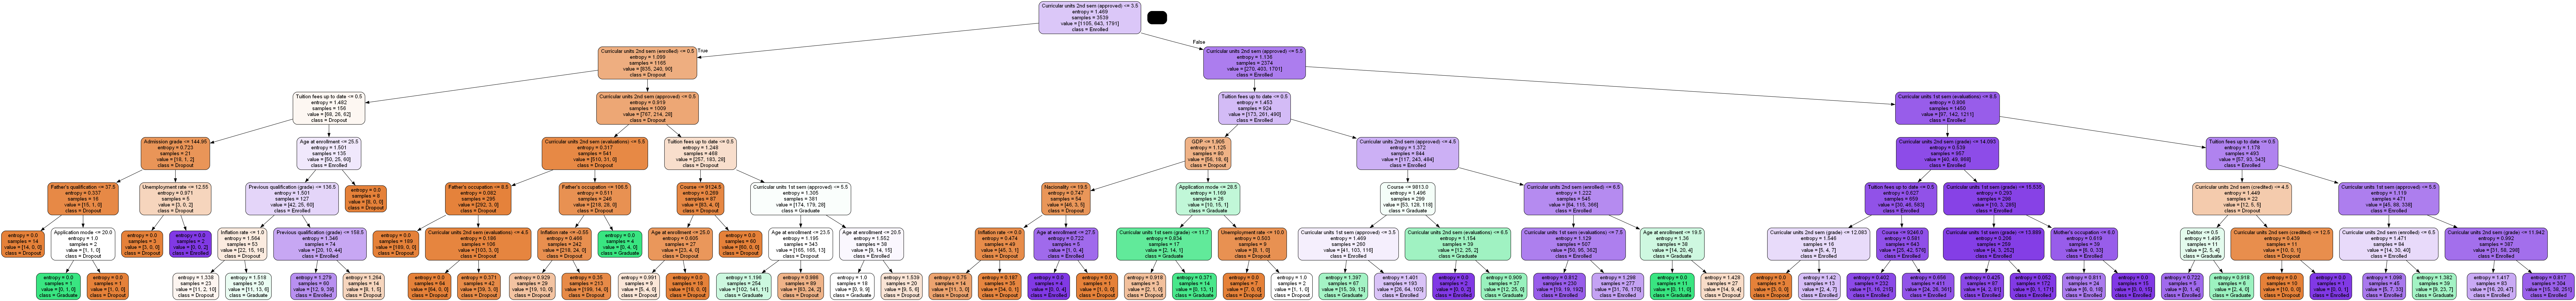

In [29]:
feature_cols = df_europe_students.drop('Target', axis=1).columns
# feature_cols = ['Debtor', 'International', 'Age at enrollment', 'Daytime/evening attendance', 'Course']

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())